# JupyterLab issues analysis

The goal of this notebook is to provide a global vision on the issues reported by users.

In [1]:
!mamba install -qy matplotlib-base wordcloud
!pip install ghapi

In [2]:
import time
from collections import Counter
from itertools import chain
from pathlib import Path
from datetime import datetime

import matplotlib.pyplot as plt
from ghapi.core import GhApi
from ghapi.page import paged
from IPython.display import display_png
from wordcloud import WordCloud

api = GhApi()

List GitHub issues

In [3]:
filters = {"state": "open"}

issues = paged(
    api.issues.list_for_repo, 
    owner="jupyterlab", 
    repo="jupyterlab", 
    **filters, 
    per_page=100
)

In [4]:
all_issues = []

for page in issues:
    all_issues.extend(page)

In [5]:
len(all_issues)

1876

## Titles wordcloud

In [ ]:
titles = " ".join(map(lambda i: i['title'], all_issues))

raw_cloud = WordCloud().generate(titles)

to_drop = {'JupyterLab', 'jupyter lab', 'jupyter'}
words = {k: v for k, v in raw_cloud.words_.items() if k not in to_drop}

In [18]:
cloud = WordCloud(scale=2).generate_from_frequencies(words)

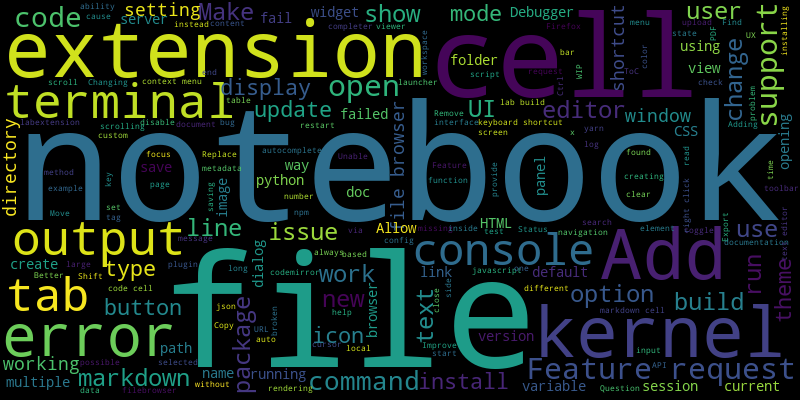

In [19]:
CLOUD_FILE = "titles_cloud.png"
cloud.to_file(CLOUD_FILE)

display_png(Path(CLOUD_FILE).read_bytes(), raw=True)

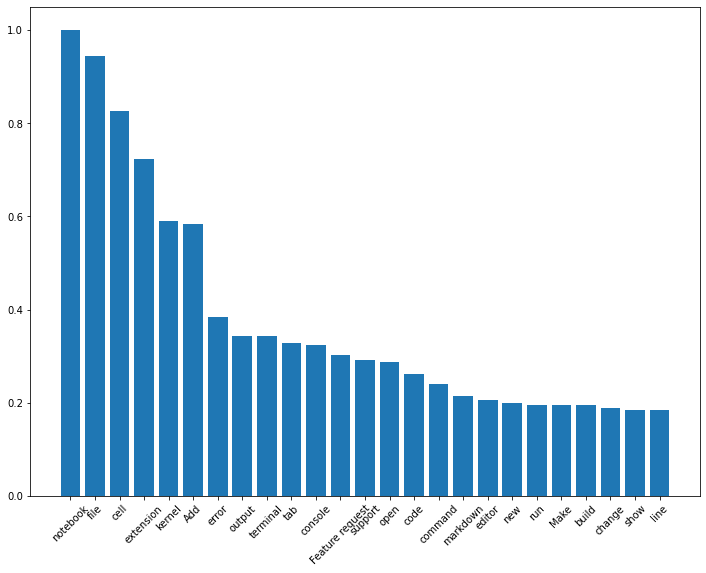

In [24]:
n_words = 25

fig = plt.figure(figsize=(12, 9))

fig.add_subplot(111).bar(list(words.keys())[:n_words], list(words.values())[:n_words])
plt.xticks(rotation=90)
plt.show();

## Group by labels

Group issues by labels.

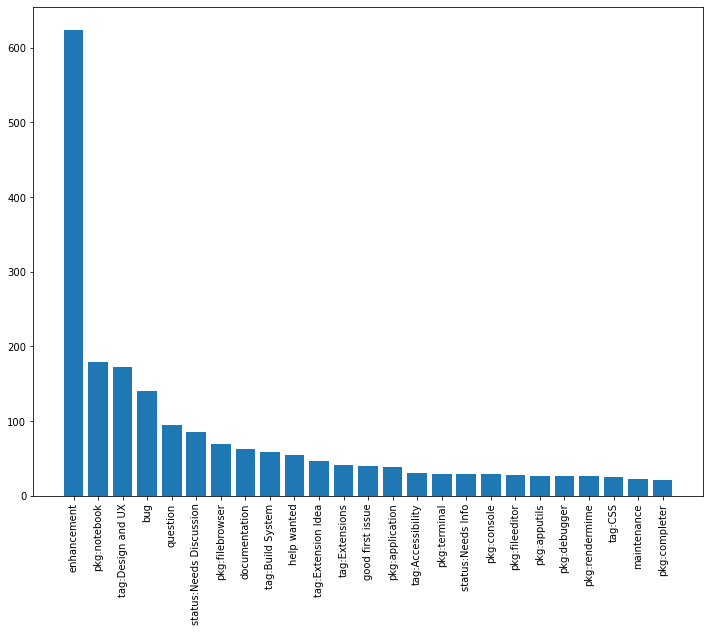

In [55]:
n_labels = 25

counter = Counter(chain(*map(lambda i: [l.name for l in (i.labels or [])], all_issues)))
most_commons = dict(counter.most_common(n_labels))

fig = plt.figure(figsize=(12, 9))

fig.add_subplot(111).bar(list(most_commons.keys()), list(most_commons.values()))
plt.xticks(rotation=90)
plt.show();

## Group by milestones

Group issues by their milestones

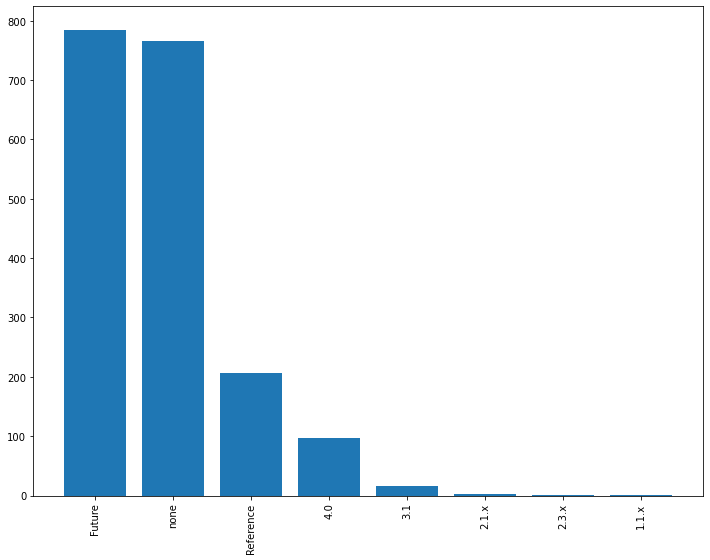

In [64]:
counter = Counter(map(lambda i: (i.milestone or {}).get("title", "none"), all_issues))
most_commons = dict(counter.most_common())

fig = plt.figure(figsize=(12, 9))

fig.add_subplot(111).bar(list(most_commons.keys()), list(most_commons.values()))
plt.xticks(rotation=90)
plt.show();

## Group by #comments

Group issues by number of comments.

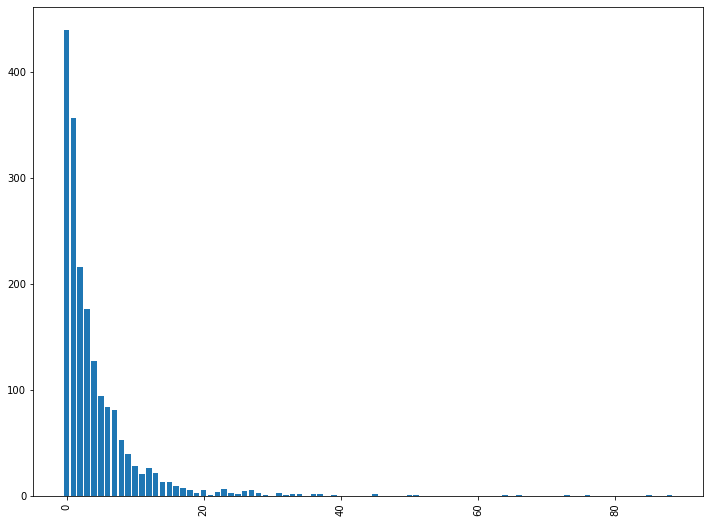

In [84]:
counter = Counter(map(lambda i: i.comments, all_issues))
most_commons = dict(counter.most_common())

fig = plt.figure(figsize=(12, 9))

fig.add_subplot(111).bar(list(most_commons.keys()), list(most_commons.values()))
plt.xticks(rotation=90)
plt.show();

## Creation time

Distribution of issue creation date per month (approximately)

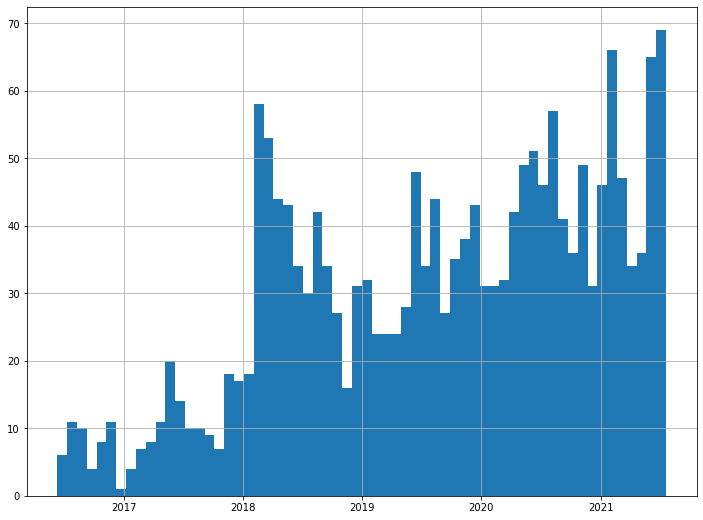

In [82]:
fig = plt.figure(figsize=(12, 9))

all_created_at = map(lambda i: datetime(*time.strptime(i.created_at, "%Y-%m-%dT%H:%M:%SZ")[:6]), all_issues)

fig.add_subplot(111).hist(list(all_created_at), bins=62)
plt.grid()
plt.show();